In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import glob
import collections
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

misreads = pd.DataFrame()
counts = dict()

In [1]:
def cleaning_data(dataset1, gold_standard_dataset1):
  dataset1_column_names = dataset1.columns
  gs_columns_names=gold_standard_dataset1.columns
  #delete any rows with accession numbers not in gold standard accessions
  #https://stackoverflow.com/questions/27965295/dropping-rows-from-dataframe-based-on-a-not-in-condition
  #https://www.kite.com/python/answers/how-to-get-the-first-column-of-a-pandas-dataframe-as-a-series-in-python
  dataset1 = dataset1[dataset1[dataset1_column_names[0]].isin(list(gold_standard_dataset1.iloc[:, 0]))]
  gold_standard_dataset_copy = gold_standard_dataset1
  gold_standard_dataset1 = gold_standard_dataset1[gold_standard_dataset1[gs_columns_names[0]].isin(list(dataset1.iloc[:, 0]))]


  #sort rows based on accession 
  #https://datatofish.com/sort-pandas-dataframe/
  dataset1.sort_values(by=[dataset1_column_names[0]], inplace=True)
  gold_standard_dataset1.sort_values(by=[gs_columns_names[0]], inplace=True)

  #https://www.geeksforgeeks.org/reset-index-in-pandas-dataframe/
  dataset1.reset_index(inplace = True,drop = True)
  gold_standard_dataset1.reset_index(inplace = True,drop = True)

  #https://www.datasciencemadesimple.com/return-first-n-character-from-left-of-column-in-pandas-python/
  #https://www.geeksforgeeks.org/apply-uppercase-to-a-column-in-pandas-dataframe/
  #https://stackoverflow.com/questions/25698710/replace-all-occurrences-of-a-string-in-a-pandas-dataframe-python
  #https://www.geeksforgeeks.org/pandas-remove-special-characters-from-column-names/
  #formatting dataframes to look alike

  for i in range(1,len(dataset1_column_names)):
    dataset1[dataset1_column_names[i]]= dataset1[dataset1_column_names[i]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
  for j in range(1,len(gs_columns_names)):
    gold_standard_dataset1[gs_columns_names[j]]= gold_standard_dataset1[gs_columns_names[j]].str[:7].str.upper().str.replace('[*,.,:,\',\",;]', '')
  return dataset1, gold_standard_dataset1


In [ ]:
'''def missed_allels(A1,A2,B1,B2,C1,C2):
  misreadsA=[*A1['A'].tolist(), *A2['A.1'].tolist()]
  print(misreadsA)

  misreadsB=[*B1['B'].tolist(), *B2['B.1'].tolist()]
  print(misreadsB)

  misreadsC=[*C1['C'].tolist(), *C2['C.1'].tolist()]
  print(misreadsC)

  A_allels = collections.Counter(misreadsA)
  B_allels = collections.Counter(misreadsB)
  C_allels = collections.Counter(misreadsC)
  return A_allels,B_allels,C_allels
  '''

In [ ]:
def create_misreads_dataframes(dataset1, gold_standard_dataset1, tool_name):
  
  #fill each dict with allele and the number of times it was mispredicted

  dataset1_column_names = dataset1.columns
  gs_columns_names=gold_standard_dataset1.columns

  #make a list or dictionary for each HLA gene (A, B, C)
  A1,A2,B1,B2,C1,C2 = pd.DataFrame, pd.DataFrame, pd.DataFrame,pd.DataFrame, pd.DataFrame, pd.DataFrame

  #Outer left Join exclusive
  #https://www.youtube.com/watch?v=iYWKfUOtGaw
  #https://stackoverflow.com/questions/41815079/pandas-merge-join-two-data-frames-on-multiple-columns
  #https://stackoverflow.com/questions/17978133/python-pandas-merge-only-certain-columns?rq=1
  #https://stackoverflow.com/questions/50543326/how-to-do-left-outer-join-exclusion-in-pandas
  #A= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[1],gs_columns_names[2]]],dataset1[[dataset1_column_names[0],dataset1_column_names[1],dataset1_column_names[2]]],left_on=[gs_columns_names[1],gs_columns_names[2]], right_on = [dataset1_column_names[1],dataset1_column_names[2]], how='left',indicator=True).query('_merge=="left_only"')
  #https://stackoverflow.com/questions/61720614/how-to-drop-merge-column-in-pandas-merge
  A1= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[1]]],dataset1[[dataset1_column_names[0],dataset1_column_names[1]]],left_on=[gs_columns_names[1]], right_on = [dataset1_column_names[1]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)
  A2= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[2]]],dataset1[[dataset1_column_names[0],dataset1_column_names[2]]],left_on=[gs_columns_names[2]], right_on = [dataset1_column_names[2]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)
  print(A1)
  print(A2)
  B1= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[3]]],dataset1[[dataset1_column_names[0],dataset1_column_names[3]]],left_on=[gs_columns_names[3]], right_on = [dataset1_column_names[3]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)
  B2= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[4]]],dataset1[[dataset1_column_names[0],dataset1_column_names[4]]],left_on=[gs_columns_names[4]], right_on = [dataset1_column_names[4]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)

  C1= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[5]]],dataset1[[dataset1_column_names[0],dataset1_column_names[5]]],left_on=[gs_columns_names[5]], right_on = [dataset1_column_names[5]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)
  C2= pd.merge(gold_standard_dataset1[[gs_columns_names[0],gs_columns_names[6]]],dataset1[[dataset1_column_names[0],dataset1_column_names[6]]],left_on=[gs_columns_names[6]], right_on = [dataset1_column_names[6]], how='left',indicator=True).query('_merge=="left_only"').drop(['_merge'], axis=1)
 
  #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

  '''
  A,B,C = pd.DataFrame, pd.DataFrame, pd.DataFrame
  A= pd.merge(A1,A2,on='Run_x', how='outer',indicator=True).drop(['_merge'], axis=1)
  B= pd.merge(B1,B2,on='Run_x', how='outer',indicator=True).drop(['_merge'], axis=1)
  C= pd.merge(C1,C2,on='Run_x', how='outer',indicator=True).drop(['_merge'], axis=1)
  '''

  #allels_missed = missed_allels(A1,A2,B1,B2,C1,C2)
  #return misread_gene_count, allels_missed
  return A1,A2,B1,B2,C1,C2

  #pd.series  then series to list 

In [ ]:
def misreadsbyallele(dataset1, gold_standard_dataset1, tool_name):
  dataframe_list = create_misreads_dataframes(dataset1, gold_standard_dataset1, tool_name)
  A1 = dataframe_list[0]
  A2 = dataframe_list[1]
  B1 = dataframe_list[2]
  B2 = dataframe_list[3]
  C1 = dataframe_list[4]
  C2 = dataframe_list[5]
  
  misreadsA=[*A1['A'].tolist(), *A2['A.1'].tolist()]
  print(misreadsA)

  misreadsB=[*B1['B'].tolist(), *B2['B.1'].tolist()]
  print(misreadsB)

  misreadsC=[*C1['C'].tolist(), *C2['C.1'].tolist()]
  print(misreadsC)

  A_allels = collections.Counter(misreadsA)
  B_allels = collections.Counter(misreadsB)
  C_allels = collections.Counter(misreadsC)
  return A_allels,B_allels,C_allels

In [ ]:
def misreadsbygene(dataset1, gold_standard_dataset1, tool_name):
  dataframe_list = create_misreads_dataframes(dataset1, gold_standard_dataset1, tool_name)
  A1 = dataframe_list[0]
  A2 = dataframe_list[1]
  B1 = dataframe_list[2]
  B2 = dataframe_list[3]
  C1 = dataframe_list[4]
  C2 = dataframe_list[5]


  a=len(A1)+len(A2)
  b=len(B1)+len(B2)
  c=len(C1)+len(C2)

  return a,b,c



In [ ]:
def misread_gene_plot(misreads_dict):
  df = pd.DataFrame.from_dict(misreads_dict, orient='index', dtype=None, columns=['A','B','C'])
  print(df)
  print(type(df))
  return df


In [ ]:
def misread_allele_plot(misreads_dict):
  

SyntaxError: ignored

In [ ]:
# MAIN - load required data
loc_gs = '/content/gdrive/MyDrive/test/datasets'
gold_standard_dataset1 = pd.read_csv(loc_gs+'/1_gs.csv')
tool_names_and_loc = dict()
how_many_tools = int(input("How many tools regarding dataset1 would you like to input"))
for i in range(how_many_tools):
  caller = input("what is filepath to caller results csv") #/content/gdrive/MyDrive/test/OPTITYPE/optitype.csv /content/gdrive/MyDrive/test/phlat.csv
  tool_name = input("what is the name of this tool").lower()
  tool_names_and_loc[tool_name]=caller

#names = dict()
#all_data = list()

#print(all_data)


How many tools regarding dataset1 would you like to input2
what is filepath to caller results csv/content/gdrive/MyDrive/test/OPTITYPE/optitype.csv
what is the name of this toolOPTITYPE
what is filepath to caller results csv/content/gdrive/MyDrive/test/phlat.csv
what is the name of this toolPHLAT


         Run_x      A Run_y HLA_A_Allele1
134  ERR009130  A2301   NaN           NaN
221  ERR009147  A68XX   NaN           NaN
         Run_x    A.1 Run_y HLA_A_Allele2
235  ERR009129  A3101   NaN           NaN
365  ERR009146  A3002   NaN           NaN
410  ERR009154  A6801   NaN           NaN
538  ERR009168  A3201   NaN           NaN
         Run_x      A Run_y HLA_A_Allele1
16   ERR009097  A2501   NaN           NaN
33   ERR009103  A2902   NaN           NaN
71   ERR009107  A2501   NaN           NaN
88   ERR009109  A3201   NaN           NaN
110  ERR009114  A2902   NaN           NaN
213  ERR009123  A2501   NaN           NaN
231  ERR009130  A2301   NaN           NaN
278  ERR009137  A3101   NaN           NaN
336  ERR009144  A3201   NaN           NaN
359  ERR009147  A68XX   NaN           NaN
432  ERR009155  A2902   NaN           NaN
         Run_x    A.1 Run_y HLA_A_Allele2
292  ERR009146  A3002   NaN           NaN
           A   B   C
OPTITYPE   6  19   9
PHLAT     12  13  16
<class 'panda

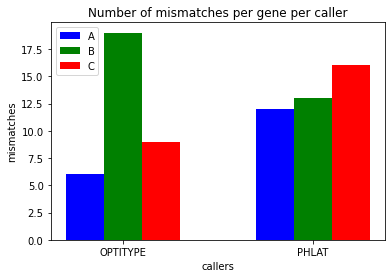

In [ ]:
# MAIN - misreads by gene graph
misreadsbygene_dict = dict()
alltools = list()

for key,value in tool_names_and_loc.items():
  dataset1 = pd.read_csv(value)
  datasets_cleaned=cleaning_data(dataset1, gold_standard_dataset1)
  dataset1=datasets_cleaned[0]
  gold_standard_dataset1=datasets_cleaned[1]
  alltools.append(key)

  misreadsbygene_dict[key] = misreadsbygene(dataset1, gold_standard_dataset1, key)
  '''
  dataset1 = dataframes[0]
  gold_standard_dataset1 = dataframes[1]
  misread_genes=gene_misread(dataset1, gold_standard_dataset1, tool_name)
  all_data.append(misread_genes)
  '''

df = misread_gene_plot(misreadsbygene_dict)
print(alltools)
df['tools']=np.array(alltools)
#https://thispointer.com/pandas-convert-a-dataframe-column-into-a-list-using-series-to_list-or-numpy-ndarray-tolist-in-python/
#https://stackoverflow.com/questions/51865367/cannot-convert-the-series-to-class-int
A= df['A'].astype(int).to_list()
B= df['B'].astype(int).to_list()
C= df['C'].astype(int).to_list()
X = df['tools']

#https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
#https://stackoverflow.com/questions/14270391/python-matplotlib-multiple-bars
x = np.arange(len(X))
ax = plt.subplot(111)
ax.bar(x-0.2, A, width=0.2, color='b', align='center')
ax.bar(x, B, width=0.2, color='g', align='center')
ax.bar(x+0.2, C, width=0.2, color='r', align='center')

plt.xticks(x, X)
plt.xlabel("callers")
plt.ylabel("mismatches")
plt.title("Number of mismatches per gene per caller")
plt.legend((('A', 'B', 'C')))
plt.show()

#df.to_csv('misreadsbygene.csv', index=False)
#categorical_data = sns.load_dataset('/content/misreadsbygene.csv')


In [ ]:
df

,A,B,C,tools
OPTITYPE,6,19,9,OPTITYPE
PHLAT,12,13,16,PHLAT


In [ ]:
df2 = pd.melt(df, id_vars="tools",var_name="Allele",value_name="Count")

In [ ]:
df2

,tools,Allele,Count
0,OPTITYPE,A,6
1,PHLAT,A,12
2,OPTITYPE,B,19
3,PHLAT,B,13
4,OPTITYPE,C,9
5,PHLAT,C,16


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


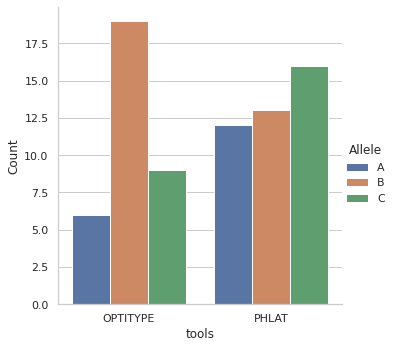

In [ ]:

import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.factorplot(x='tools',y='Count',hue='Allele',data=df2,kind='bar')

         Run_x      A Run_y HLA_A_Allele1
134  ERR009130  A2301   NaN           NaN
221  ERR009147  A68XX   NaN           NaN
         Run_x    A.1 Run_y HLA_A_Allele2
235  ERR009129  A3101   NaN           NaN
365  ERR009146  A3002   NaN           NaN
410  ERR009154  A6801   NaN           NaN
538  ERR009168  A3201   NaN           NaN
['A2301', 'A68XX', 'A3101', 'A3002', 'A6801', 'A3201']
['B4901', 'B3503', 'B1402', 'B0801', 'B0801', 'B2705', 'B0801', 'B1501', 'B1501', 'B0801', 'B5101', 'B5101', 'B1501', 'B55XX', 'B5501', 'B2705', 'B3801', 'B0801', 'B0801']
['C0304', 'C1601', 'C0304', 'C0303', 'C0305', 'C0304', 'C0704', 'C0704', 'C0704']
         Run_x      A Run_y HLA_A_Allele1
16   ERR009097  A2501   NaN           NaN
33   ERR009103  A2902   NaN           NaN
71   ERR009107  A2501   NaN           NaN
88   ERR009109  A3201   NaN           NaN
110  ERR009114  A2902   NaN           NaN
213  ERR009123  A2501   NaN           NaN
231  ERR009130  A2301   NaN           NaN
278  ERR009137  A31

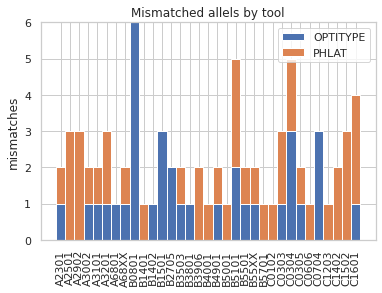

[] 
 [] 
 []


"\ndataframe2 = pd.DataFrame(columns=['tools','allels','counts'])\ndataframe2['tools']=tool_names_list\ndataframe2['allels']=allels_list\ndataframe2['counts']=counts_list\ndataframe2\n"

In [ ]:
# MAIN - misreds by allele graph
misreadsbyallele_dict = dict()

for key,value in tool_names_and_loc.items():
  
  dataset1 = pd.read_csv(value)
  datasets_cleaned=cleaning_data(dataset1, gold_standard_dataset1)
  dataset1=datasets_cleaned[0]
  #gold_standard_dataset1=datasets_cleaned[1]
  #alltools.append(key)
  

  misreadsbyallele_dict[key] = misreadsbyallele(dataset1, gold_standard_dataset1, key)

#make a list with unique allels
#check if allele is in allele list for each tool and if so append count into a seperate list else append 0
#make each list wihtin counter into a bar graph using for loop
#x values are unique allels
#show plot
'''
tool_names_list, allels_list1, unique_allels_list, counts_list1 = list(),list(),list(),list()
mappings, allels_list2 = dict(),dict()
#misread_allele_plot(misreadsbyallele_dict)
for key, value in misreadsbyallele_dict.items():
  for i in range(len(value)):
    for key2, value2 in value[i].items():
      allels_list1.append(key2)
      counts_list1.append(value2)
      allels_list2[key2] = (value2)
      tool_names_list.append(key)
  mappings[key]=[allels_list2]
  allels_list2=dict()
#https://www.geeksforgeeks.org/python-get-unique-values-list/
temporary_set = list(set(allels_list1))

count=0
lis = mappings.items()[0].keys()
for haplo in temporary_set:
  for key in mappings.keys():
    for value in mappings.values():
      if haplo not in list(value[0].keys()):
        value[0][haplo] = 0
    mappings[key]=value[0].keys()

print(mappings,'===========')
    #if haplo not in value[0].keys():
      ##value[0][haplo]=0
  #print(key)
    #value2 = dict(sorted(value[0].items()))
      #value[0][haplo]=0
    #else:
  #mappings[key] = dict(sorted(value[0].items()))
#print(value3,"=====================================")

#print(mappings)
'''
'''
    if haplo not in value[0]:
      value[0].append(haplo)
      value[1].append(int(0))
    mappings[key]=value

print(mappings)
'''


mappings=dict()
tool_names_list, allels_list1, allels_list2, unique_allels_list, counts_list1 = list(),list(),list(),list(), list()
#misread_allele_plot(misreadsbyallele_dict)
for key, value in misreadsbyallele_dict.items():
  for i in range(len(value)):
    for key2, value2 in value[i].items():
      allels_list1.append(key2)
      allels_list2.append(key2)
      counts_list1.append(value2)
  mappings[key]=[allels_list1, counts_list1]
  allels_list1=list()
  counts_list1=list()
temporary_set = sorted(list(set(allels_list2)))
print(temporary_set,'=================================================================')

#for key in mappings.keys():

print(mappings)
fig, ax = plt.subplots()
cont = list()
for keys, values in mappings.items():
  labels=mappings[keys][0]
  counts=mappings[keys][1]
  print(len(counts))
  print(keys)
  #Justin's code
  lookup = {k: v for (k, v) in zip(labels, counts)}
  bottom = [lookup.get(x, 0) for x in temporary_set]
  cont.append(bottom)
  print(bottom,'[[[[[[[[\n',lookup)
  if len(cont) > 1:
    print(bottom, temporary_set)
    ax.bar(temporary_set, bottom, 1, bottom=cont[-2], label=keys)
  elif len(cont) == 1:
    ax.bar(temporary_set, bottom, 1, label=keys)
print(mappings.keys())

ax.set_ylabel('mismatches')
ax.set_title('Mismatched allels by tool')
ax.legend()
plt.xticks(rotation='vertical')

plt.show()


'''

fig, ax = plt.subplots()

labels=mappings['OPTITYPE'][0]
counts=mappings['OPTITYPE'][1]
labels_2=mappings['PHLAT'][0]
counts2=mappings['PHLAT'][1]
ax.bar(labels, counts, 1, label='opt')
bottom = list()
'''
if len(counts) > len(counts2):
  bottom = counts[:len(counts2)]
else:
  bottom = counts + [0]*(len(counts2)-len(counts))
'''
#Justin's code
lookup = {k: v for (k, v) in zip(labels, counts)}
bottom = [lookup.get(x, 0) for x in labels_2]
print(bottom, counts,'***********************************************************************')
#myList = (self.myList + [0] * 4)[:4]

ax.bar(labels_2, counts2, 1, bottom=bottom, label='phlat')

ax.set_ylabel('Allele')
ax.set_title('Mismatched allels by tool')
ax.legend()
plt.xticks(rotation='vertical')

plt.show()
'''

'''
      tool_names_list.append(key)
      allels_list.append(key2)
      counts_list.append(value2)
unique_allels_list = list(set(allels_list))
tool_hold = tool_names_list[0]
'''

  


      
print(allels_list,'\n', tool_names_list,'\n',counts_list)
#STUCK BUT WORKING ON IT
'''
#https://www.geeksforgeeks.org/python-ways-to-remove-duplicates-from-list/
counter = 0
list_final_count_for_each_tool = list()
unique_allels_list = [i for n, i in enumerate(allels_list) if i not in allels_list[:n]]
for key, value in misreadsbyallele_dict.items():
  for i in range(len(value)):
    for key2, value2 in value[i].items():
      if key2 not in unique_allels_list:
        counts_list.append(0)
      else:
        counts_list.append(int(value2))
      tool_names_list.append(key)
    list_final_count_for_each_tool.append(counts_list)
'''
'''
  #https://www.geeksforgeeks.org/create-a-stacked-bar-plot-in-matplotlib/
  if counter == 0:
    plt.bar(unique_allels_list, list_final_count_for_each_tool[counter])
    holding_for_bottom = list_final_count_for_each_tool[counter]
  else:
    holding_for_bottom = holding_for_bottom + list_final_count_for_each_tool[counter]
    plt.bar(unique_allels_list, list_final_count_for_each_tool[counter], bottom=holding_for_bottom)
  counter = counter + 1

plt.xlabel("allels")
plt.ylabel("misread")
plt.legend(alltools)
plt.title("misread_allels")
plt.show()
'''

#print(unique_allels_list, list_final_count_for_each_tool)
'''
index_lists = list()
for i in range(1,len(alltools)):
  #https://www.programiz.com/python-programming/methods/list/index
  #https://www.w3schools.com/python/ref_func_range.asp
  index=tool_names_list.index(alltools[i])
  index_lists.append(index)
print(index_lists, tool_names_list, alltools)
'''

'''
dataframe2 = pd.DataFrame(columns=['tools','allels','counts'])
dataframe2['tools']=tool_names_list
dataframe2['allels']=allels_list
dataframe2['counts']=counts_list
dataframe2
'''

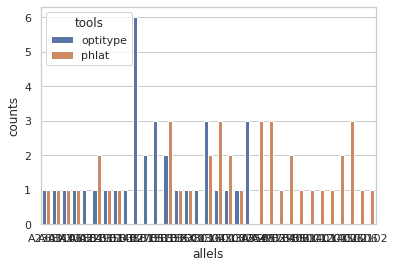

In [ ]:
dataframe2
import seaborn as sns
sns.set_theme(style="whitegrid")
ax=sns.barplot(x="allels",y="counts",data=dataframe2,hue="tools")